In [ ]:
import localuf

# Visualising Macar
First, sample an error using noise level $p =5 \times 10^{-2}$
and visualise it on the circuit-level decoding graph:

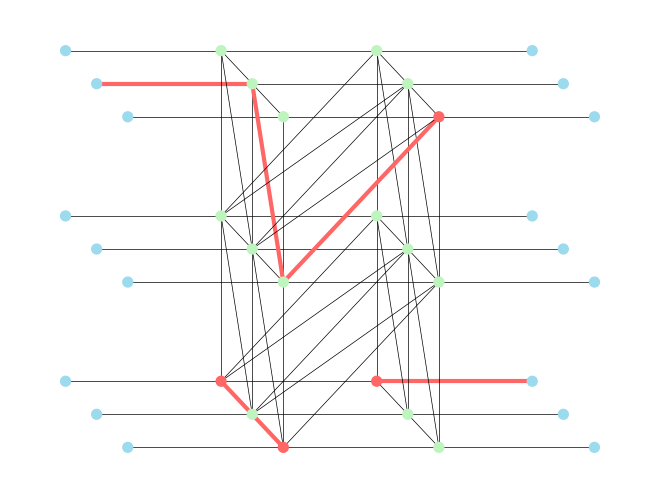

In [ ]:
code = localuf.Surface(3, 'circuit-level')
error = code.make_error(5e-2)
code.draw(error, with_labels=False);

Drawing key:
* defects are red nodes;
other detectors, green;
boundary nodes, blue
* bitflipped edges are thick and red;
else, thin and black

Next, compute the syndrome, feed it into Macar, and visualise the decoding:

In [ ]:
decoder = localuf.decoders.Macar(code)
syndrome = code.get_syndrome(error)
decoder.decode(syndrome, draw=True)

interactive(children=(BoundedIntText(value=1, description='timestep:', max=20, min=1), Output()), _dom_classes…

(14, 6)

This should make an interactive widget in which one can click through each timestep.
If this does not work, add `style='horizontal'` keyword argument to output a static image.
Drawing key:
* ungrown edges are invisible
* half-grown edges are dotted
* fully grown edges are solid
* active nodes are square-shaped
* inactive nodes are circular
* CID is shown as a label
* nodes with anyons are outlined in black
* pointers are shown by arrows on edges
* edges so far added to the correction are in black
* the top-left node also shows the controller stage (PS stands for presyncing etc.)

# Making Threshold Data

Emulate $10^4$ decoding cycles of UF on the surface code under code capacity,
for $(d, p) \in \{3, 5, 7\} \times \{0.06, 0.08, 0.1, 0.12\}$:

In [ ]:
import numpy as np

ds = range(3, 9, 2)
ps = np.linspace(0.05, 0.15, 4)
n = int(1e4)

fUF = localuf.sim.accuracy.monte_carlo(
    sample_counts={d: [(p, n) for p in ps] for d in ds},
    code_class=localuf.Surface,
    decoder_class=localuf.decoders.UF,
    noise='code capacity',
)

Plot the logical success/failure data:

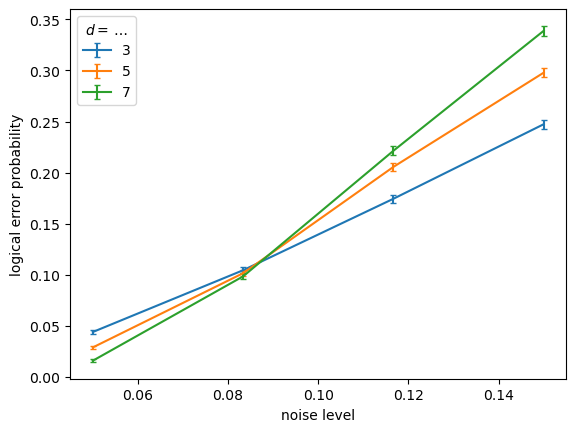

In [ ]:
localuf.plot.accuracy.monte_carlo(fUF);

One should see a threshold around 0.09.

# Making Runtime Data

Simulate $10^2$ syndrome validations of Macar on the surface code under circuit-level noise,
for $(d, p) \in \{3, 5, 7, 9\} \times \{10^{-3}, 5\times 10^{-3}, 10^{-2}\}$,
then plot the data:

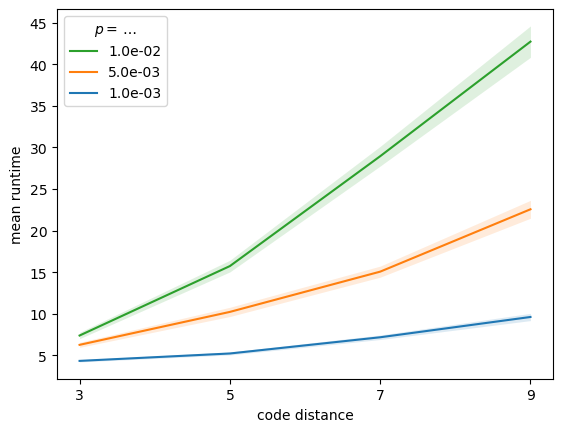

In [ ]:
tMacar = localuf.sim.runtime.batch(
    ds=range(3, 11, 2),
    ps=[1e-3, 5e-3, 1e-2],
    n=int(1e2),
    noise='circuit-level',
    decoder_class=localuf.decoders.Macar,
)
localuf.plot.runtime.mean(tMacar);

To do the same for Actis, set `decoder_class=tchsc.decoders.Actis`.

# Visualising Snowflake

First,
initialise the viewing window for a distance-3 surface code under circuit-level noise,
and draw it:

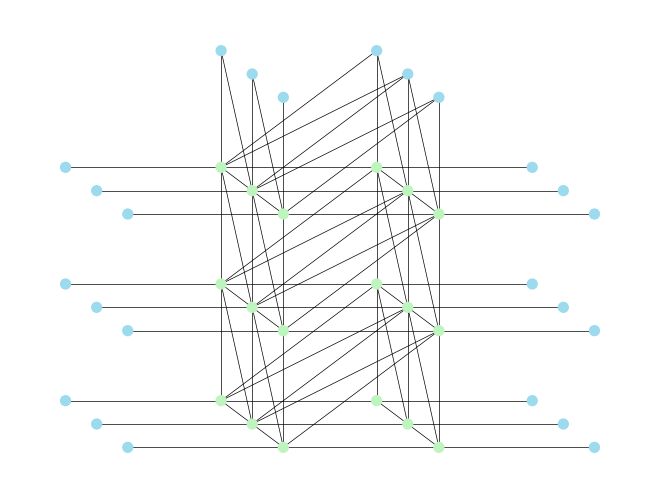

In [ ]:
code = localuf.Surface(3, 'circuit-level', scheme='frugal')
code.draw(with_labels=False);

Crucially, `scheme='frugal'` indicates `code` represents the viewing window,
not the whole (indefinitely tall) decoding graph.
Next,
emulate and visualise $2d$ decoding cycles of Snowflake
using noise level $p =5 \times 10^{-2}$:

In [ ]:
decoder = localuf.decoders.Snowflake(code)
code.SCHEME.run(decoder, 0.05, 2, draw='fine')

interactive(children=(BoundedIntText(value=1, description='timestep:', max=66, min=1), Output()), _dom_classes…

(0, 2)

The second line essentially calls `_schemes.Frugal.advance` repeatedly.
Drawing key same as in [Visualising Macar](#visualising-macar) except:
* `CID` value `reset` is labelled 'R'
* nodes with `unrooted = true` are outlined in black (anyons do not exist in Snowflake)
* nodes with `grown = whole = true` have a `'` after the CID label
* nodes with `grown = true, whole = false` have a `:` after the CID label
* nodes with `grown = false, whole = false` have a `,` after the CID label
* stage labels (D, G, M, g, m) stand for
(`drop, grow_whole, merging_whole, grow_half, merging_half`)

To draw 1 _decoding cycle_ (instead of timestep) per frame,
change `draw='coarse'`.

# Making Threshold Data for Snowflake

Below is an example of emulating $2 \times 10^3 d$ decoding cycles of
Snowflake applied to the repetition code under phenomenological noise,
and plotting the accuracy.
Generating `fUF` takes about 26 seconds on a MacBook M1.

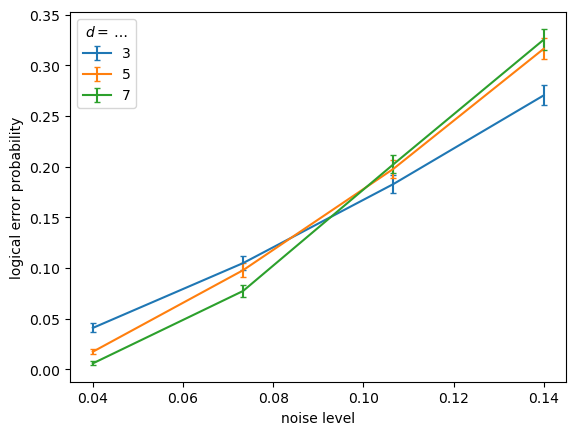

In [ ]:
ds = range(3, 9, 2)
ps = np.linspace(0.04, 0.14, 4)
n = int(2e3)

fUF = localuf.sim.accuracy.monte_carlo(
    sample_counts={d: [(p, n) for p in ps] for d in ds},
    code_class=localuf.Repetition,
    decoder_class=localuf.decoders.Snowflake,
    noise='phenomenological',
    scheme='frugal',
)
localuf.plot.accuracy.monte_carlo(fUF);

One should see a threshold around 0.09 as in [Making Threshold Data](#making-threshold-data).